In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline





In [11]:
df = pd.read_csv('winequality-white.csv') #Read data

In [12]:
df.describe() #summary table

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


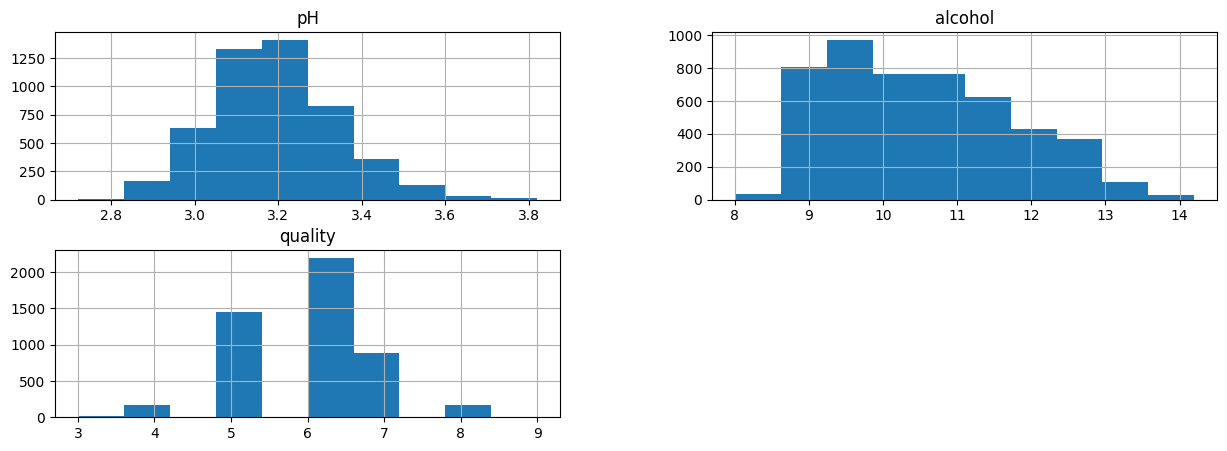

In [13]:
#Graphical summary of some data statistics
x_names = ['pH','alcohol','quality']
X = df[x_names]
X.hist(figsize=(15,5))
plt.xlabel('quality')
plt.ylabel('frequency')
plt.show()

In [14]:
#Define feature X and target variable y
X = df.drop('quality', axis = 1) #all columns except 'quality'
y = df['quality'] #Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

In [17]:
#Define Models

# Model 1: Decision Tree
print("Running...")
decision_tree = DecisionTreeClassifier(random_state = 42)
scores_dt = cross_val_score(decision_tree, X, y, cv=5, scoring='accuracy')
print(f"Decision Tree Cross-Validation Accuracy: {scores_dt.mean():.4f} (std: {scores_dt.std():.4f})")

#Model 2: SVM with Linear Kernel
#Warning: it takes long time to train
print("Running...")
svm_model = make_pipeline(StandardScaler(),SVC(kernel='linear'))
scores_svm = cross_val_score(svm_model, X, y, cv=5, scoring="accuracy")
print(f"SVM (Linear Kernel) Cross-Validation Accuracy: {scores_svm.mean():.4f} (std: {scores_svm.std():.4f})")


Running...
Decision Tree Cross-Validation Accuracy: 0.4020 (std: 0.0226)
Running...
SVM (Linear Kernel) Cross-Validation Accuracy: 0.5110 (std: 0.0216)


In [8]:
# Hyperparameter tuning for Decision Tree
hyperparameters = {'max_depth':[4, 5, 6, 7], 'criterion':['gini', 'entropy'] }

print("Now tuning hyperparameters...")
clf = GridSearchCV(decision_tree, hyperparameters, cv=5, scoring='accuracy', verbose=4)
clf.fit(X_train, y_train)

# Get the best Decision Tree model
best_dt = clf.best_estimator_
print("Best Decision Tree Parameters:", clf.best_params_)

# Evaluate on the test set
y_pred_svm = best_dt.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_svm))

Now tuning hyperparameters...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.520 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=4;, score=0.528 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=4;, score=0.554 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=4;, score=0.521 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=4;, score=0.523 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=5;, score=0.519 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=5;, score=0.522 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=5;, score=0.532 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=5;, score=0.521 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=5;, score=0.511 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=6;, score=0.535 total time=   0.0s
[CV 2/5] END ......

/project/cacds/apps/anaconda3/5.0.1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/cacds/apps/anaconda3/5.0.1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/cacds/apps/anaconda3/5.0.1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [22]:
# Hyperparameter tuning for SVM with Linear Kernel
# Define a pipeline with a scaler and an SVM with a linear kernel
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear'))
])
param_grid_svm_linear = {
    'svm__C': [0.1, 1, 10],
}

grid_search_svm_linear = GridSearchCV(pipeline, param_grid_svm_linear, cv=5, scoring='accuracy')
grid_search_svm_linear.fit(X_train, y_train)

# Get the best SVM model with Linear Kernel
best_svm_linear = grid_search_svm_linear.best_estimator_
print("Best SVM with Linear Kernel Parameters:", grid_search_svm_linear.best_params_)

Best SVM with Linear Kernel Parameters: {'svm__C': 10}


In [ ]:
# Model: SVM with Linear Kernel (previously tuned)
best_svm_linear = SVC(kernel='linear', C=10, random_state=42)

# Feature selection using PCA
pca_pipeline = make_pipeline(PCA(n_components=10), best_svm_linear)

# Fit the pipeline on the training data
pca_pipeline.fit(X_train, y_train)

# Evaluate on the test set
y_pred_svm_pca = pca_pipeline.predict(X_test)
print("SVM with Linear Kernel and PCA Classification Report:")
print(classification_report(y_test, y_pred_svm_pca))

#Reduce Training Time, Mitigation of overfitting

In [9]:
#I will assume Decision Tree is the best model so far, since SVM model takes too long to train, I don't know its accuracy
# DummyClassifier
dummy_model = DummyClassifier(strategy="most_frequent")  # You can adjust the strategy based on your needs
dummy_model.fit(X_train, y_train)
y_pred_dummy = dummy_model.predict(X_test)

# Evaluate DummyClassifier
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
print(f"Accuracy of DummyClassifier: {accuracy_dummy:.4f}")

Accuracy of DummyClassifier: 0.4544


In [11]:
decision_tree = DecisionTreeClassifier(criterion="gini", max_depth= 6,random_state = 42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of Decision Tree: {accuracy_dt:.4f}")

Accuracy of Decision Tree: 0.5286


In [ ]:
#Decision Tree has higher accuracy in this case